In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize
%matplotlib notebook

In [19]:
s = np.load('sun_8hrs_3-18-2020.npz')
data = s['arr_0']
plt.plot(data[1], data[0])
plt.plot(data[1][:-14500], data[0][:-14500])
sun = data[0][:-12400]
sunt = data[1][:-12400]
fs = np.flip((sun/ 4.5e-8)/1000)[1000:]

<IPython.core.display.Javascript object>


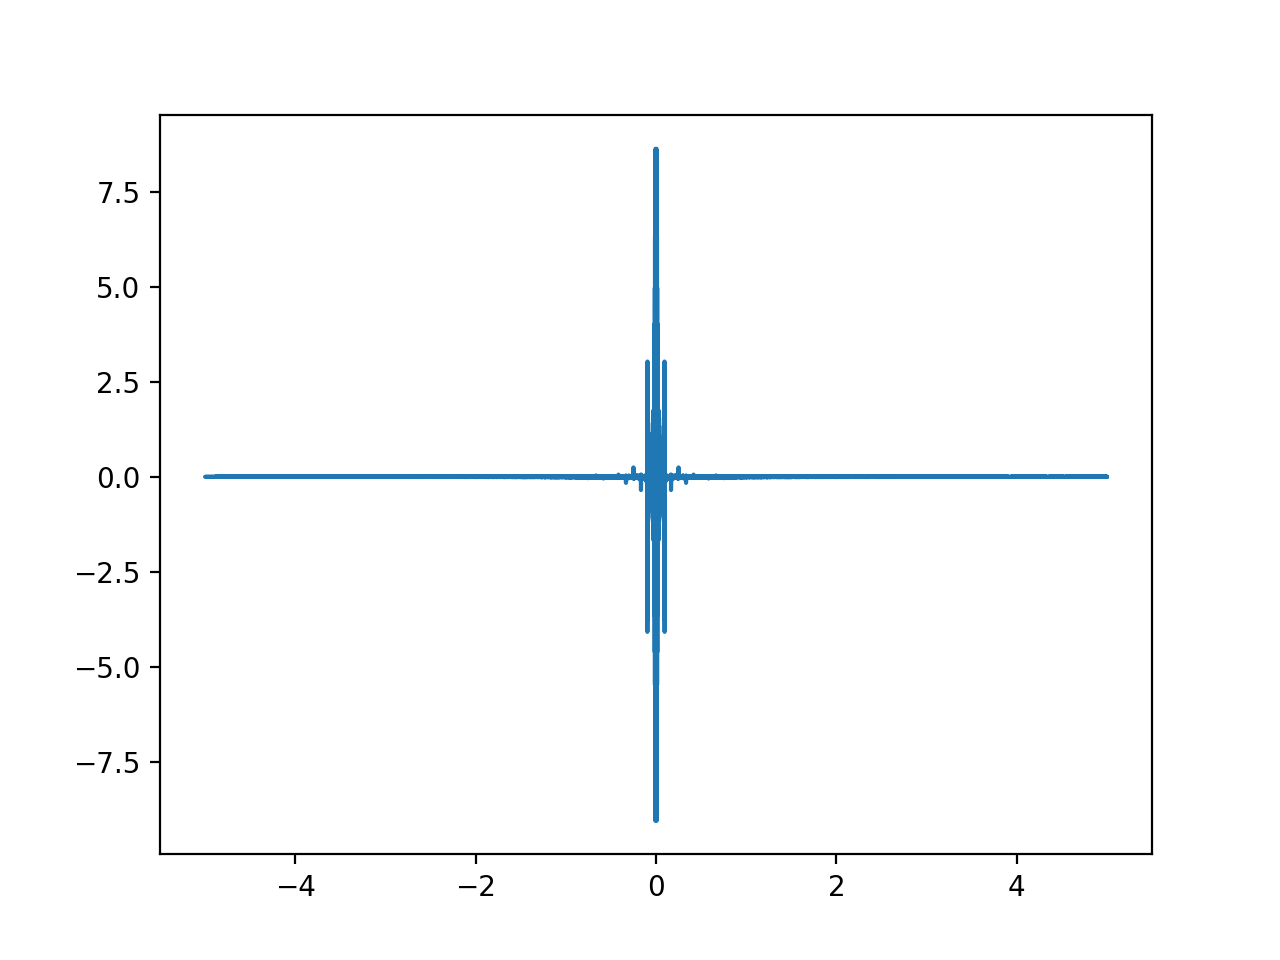

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
ftsun = np.fft.fft(sun)
ftaxis = np.fft.fftfreq(len(sun), .1)
ftsun[0] = 0
plt.plot(ftaxis,ftsun)


csun = np.fft.fftshift(ftsun)[51000:51800]
#plt.plot(np.linspace(0, 400/10, 400), np.abs(csun)[400:])

0.0022326693546818157


<IPython.core.display.Javascript object>


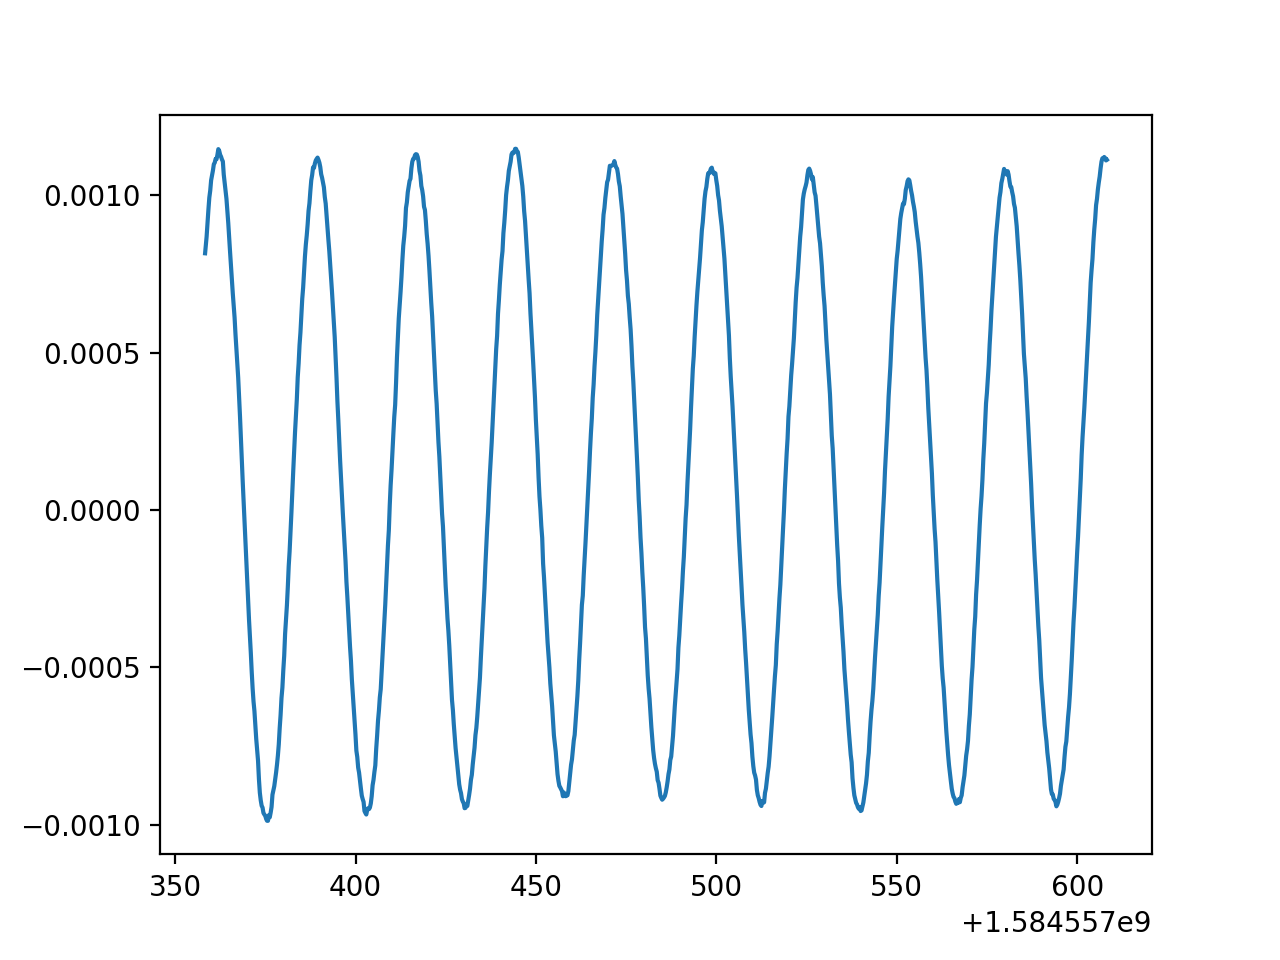

[ 0.00111533  0.00114633 -0.00096967  0.00108833  0.00111933 -0.00094767
  0.00113033 -0.00093667  0.00113533  0.00114733 -0.00089767  0.00110833
  0.00108733  0.00107133 -0.00092467  0.00108433  0.00105733 -0.00094467
  0.00097333  0.00105033 -0.00092967 -0.00091867  0.00108333  0.00107533
  0.00107633  0.00111733  0.00112133]


In [4]:
print(np.mean(sun))
msun = np.mean(sun)
psun = sun - msun # np.abs(sun - msun)**2
plt.plot(sunt[:1000], psun[:1000])
# get period
p = signal.find_peaks(psun[:1000])
print(psun[:1000][p[0]])
#plt.plot(sunt[:1000][p[0]], psun[:1000][p[0]], "o")

hsun = signal.hilbert(psun)
#plt.plot(np.abs(hsun))
#plt.plot(np.abs(hsun)[1000:-1000])
envelope = np.abs(hsun)[1000:-1000]
envelopt = sunt[1000:-1000]
phase = np.unwrap(np.angle(hsun))



<IPython.core.display.Javascript object>


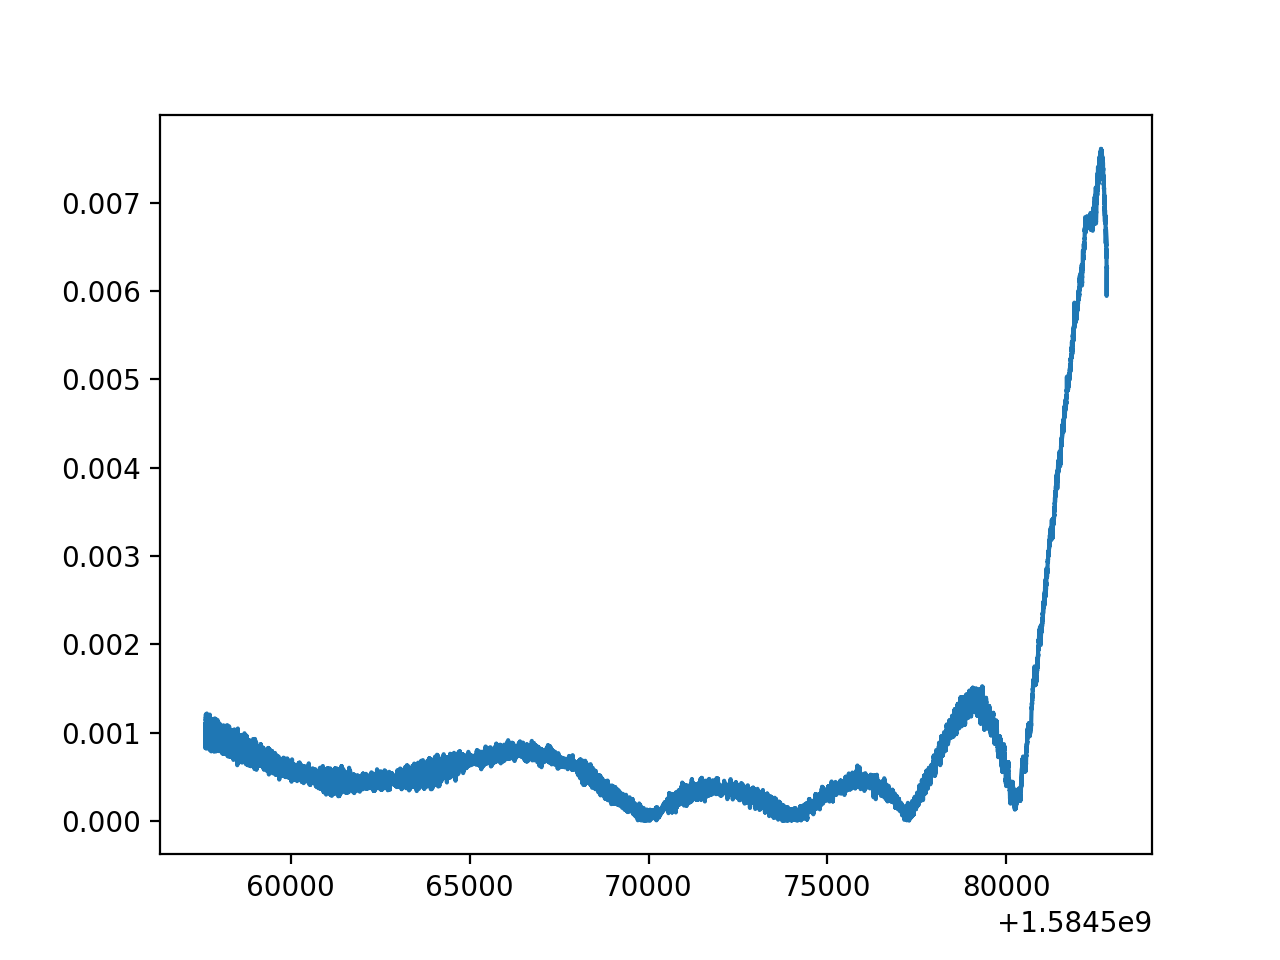

In [4]:
plt.plot(envelopt, envelope)


In [9]:
envelopejy = (envelope / 4.5e-8)/1000
plt.plot(envelopt, envelopejy)
filteredenvelope = signal.savgol_filter(envelopejy, 3001,5)
ft = envelopt
plt.plot(ft, filteredenvelope)
flipped = np.flip(filteredenvelope)
fe = np.flip(envelopejy)


<IPython.core.display.Javascript object>


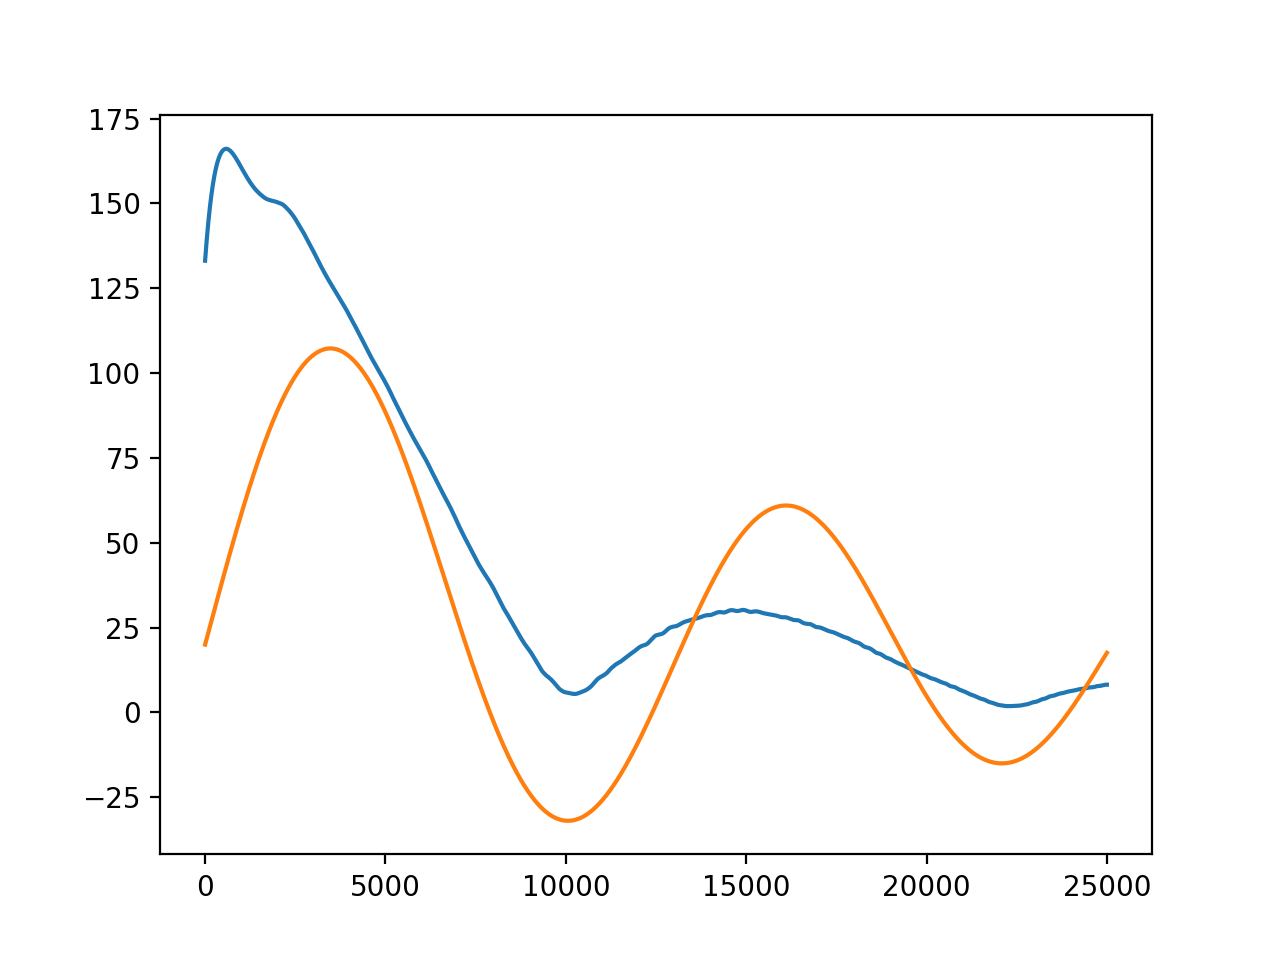

25000
[24.22641523 46.67204047  1.00004439]


In [7]:
#x = np.linspace(0,100,1000)
#plt.plot(x, 100*special.j1(.1*x))

sflip = flipped[:25000]
plt.plot(sflip)
print(len(sflip))
x = np.linspace(0,25000,25000)

def bessel(var, a, b, c):
    return a*(special.j1(c*var)) + b

guess = [100, 20, .0001]
popt, pcov = optimize.curve_fit(bessel, x, sflip)
print(popt)

plt.plot(x, bessel(x, 150, 20, .00053))

<IPython.core.display.Javascript object>


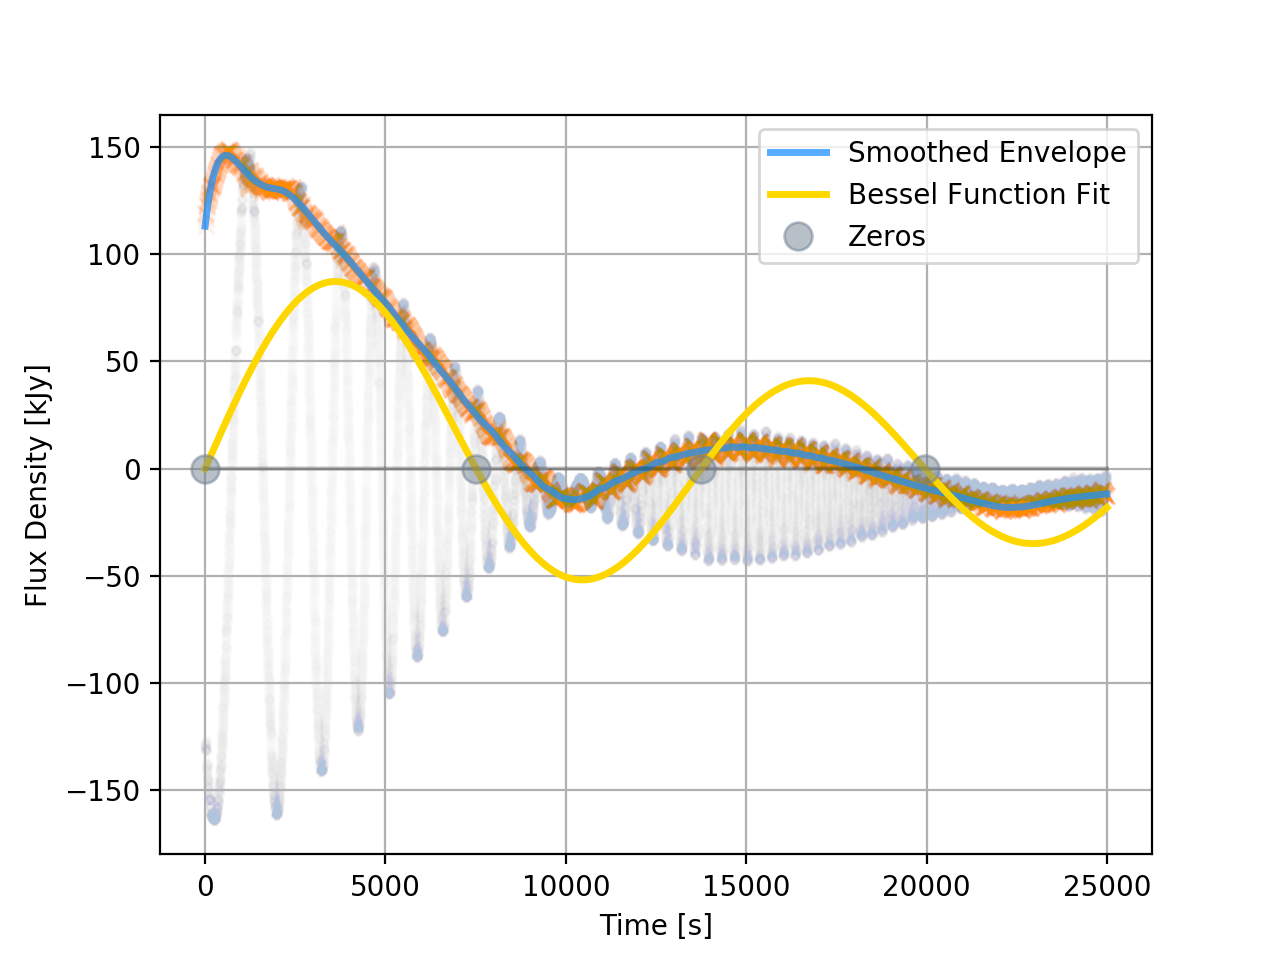

[    0.          7513.14896119 13756.05229376 19947.97673542]


Text(0, 0.5, 'Flux Density [kJy]')

In [49]:


def fitbessel(x):
    return 150*(special.j1(.00051*x))

b = bessel(x, 150, 0, .00053)

plt.plot(fs[:25000] - 60, marker=".", color="lightsteelblue", alpha=0.005)
plt.plot(fe[:25000] - 20, marker="x", color="darkorange", alpha=.01)
plt.plot(sflip - 20, label="Smoothed Envelope", color="dodgerblue", linewidth=2.5, alpha=.75)
plt.plot(x, fitbessel(x), label="Bessel Function Fit", color="gold", linewidth=2.5)
plt.plot(x, [0]*len(x), color="black", alpha=.25)

# find zeros
guess = [0, 5500, 13000, 20000]
zeros = optimize.fsolve(fitbessel, guess)
print(zeros)
z1 = zeros[1]; z2 = zeros[2]; z3 = zeros[3]


plt.plot(zeros, [0,0,0,0], 'o', markersize=10, label="Zeros", color="slategray", alpha=.5)
plt.grid()
plt.legend()
plt.xlabel(r'Time [s]')
plt.ylabel(r'Flux Density [kJy]')



In [91]:
d1 = (z2-z1)/10
d2 = (z3-z2)/10
avg = (d1 + d2)/2
print(d1)
print(d2)
print(f'It took an average of {avg} seconds, or {avg/60} mins')


624.2903332565595
619.1924441660827
It took an average of 621.7413887113212 seconds, or 10.36235647852202 mins


In [ ]:
# There’s a zero whenever there’s an integral number of fringe periods over the source width.

